In [1]:
import histogram_manager as hm
import ROOT 
import stage0
import stage1
import utils

Welcome to JupyROOT 6.28/00


In [2]:
hists = hm.HistogramManager("../output/2023apr_asym_Cd_constbin.root")
hists

<HistogramManager(filename='../output/2023apr_asym_Cd_constbin.root', total_objects=353)>


Name              | Type  
---------------------------
hEgam             | 📂 TH1D
hEgam_gate45      | 📂 TH1D
hEn               | 📂 TH1D
hEn_gate9394      | 📂 TH1D
hEn_gate9394SE    | 📂 TH1D
hEn_gate9394SEbkg | 📂 TH1D
hEn_gate9394bkg   | 📂 TH1D
hEn_gtzero        | 📂 TH1D
hEn_zero          | 📂 TH1D
hPulseHeight      | 📂 TH1D
hTOF_mus          | 📂 TH1D
hEn_gate477_all   | 📊 TH1D

In [3]:
regions = {"hEn_gate9394":[9316,9408],
           "hEn_gate9394bkg":[9474,9694],
           "hEn_gate9394SE":[8860,8892],
           "hEn_gate9394SEbkg":[8908,8968],}

# gates = ["hEn_gate9394","hEn_gate9394SE"]

In [4]:
# for gate in gates:
#     hist = hists.get(gate)
#     hist_bkg = hists.get(gate+'bkg')

In [5]:
hEgam_dict = hists.get("hEgam")


[0, 0, 0, 0.5309547289990312, 0, 0, 0.5366717201562932, 0.5680757777397413, 0, 0.5543569593667347, 0.555412782503887, 0.5201571212714943, 0, 0.5329220537314615, 0, 0.5727297230260538, 0, 0.4607588348322972, 0.5936315685640702, 0.5668434762293223, 0.5930835364884498, 0, 0, 0, 0, 0, 0.5749766598613185, 0, 0, 0, 0, 0]
[0, 0, 0, 0.6295028190340003, 0, 0, 0.6373555219862331, 0.6329269538236166, 0, 0.6353929967120457, 0.6368336538608548, 0.6326079432405467, 0, 0.6342090771184042, 0, 0.6304071204974601, 0, 0.5557925659273963, 0.6310999886497525, 0.6491663697138256, 0.6361066668469563, 0, 0, 0, 0, 0, 0.6480176570523373, 0, 0, 0, 0, 0]


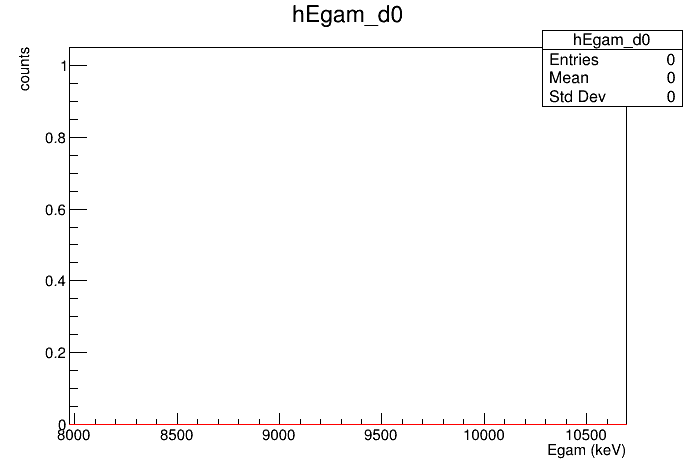

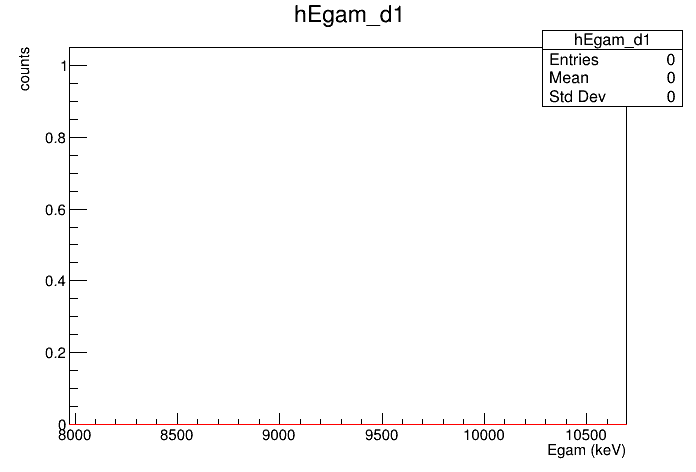

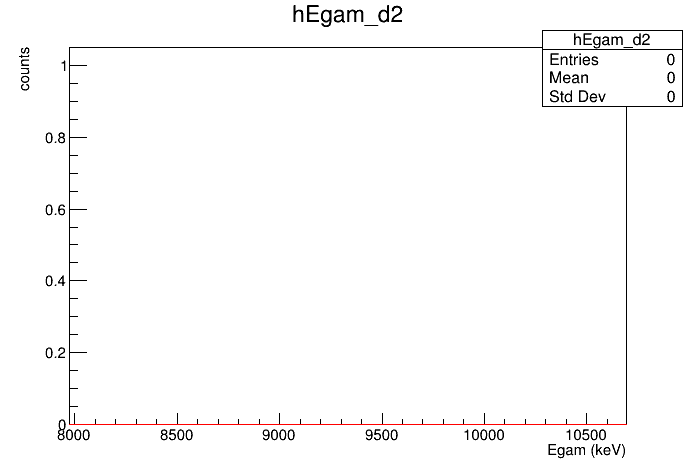

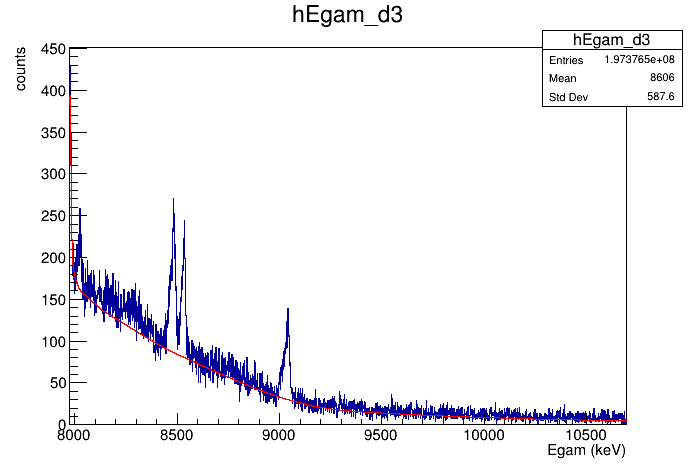

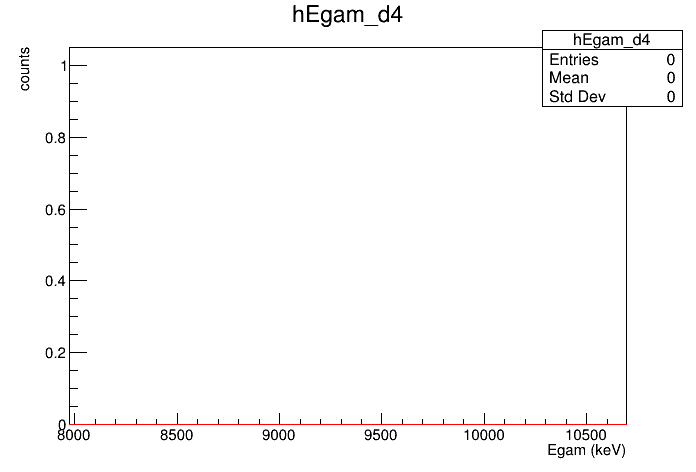

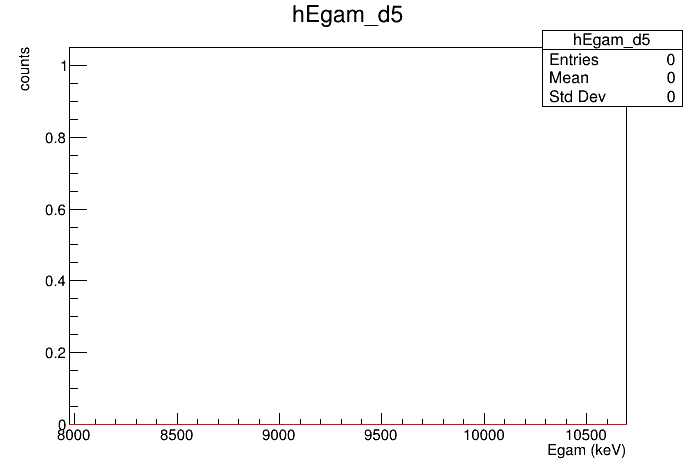

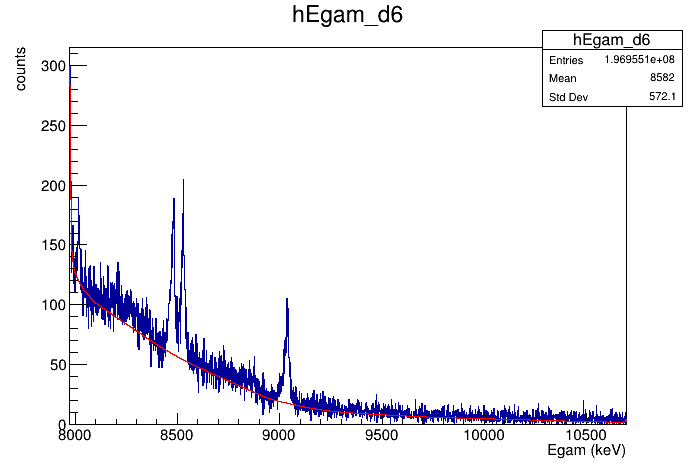

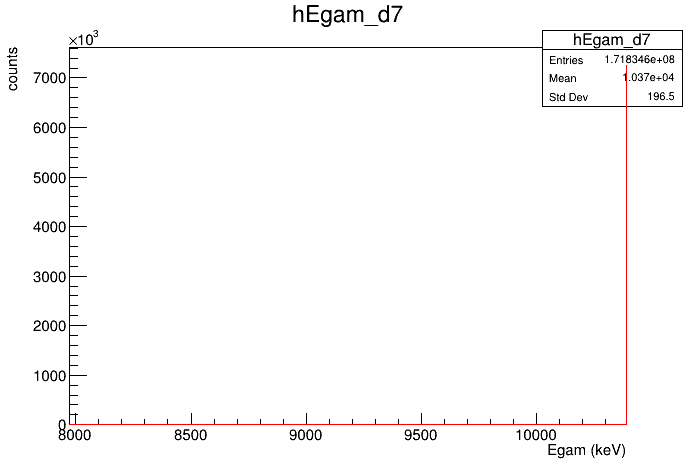

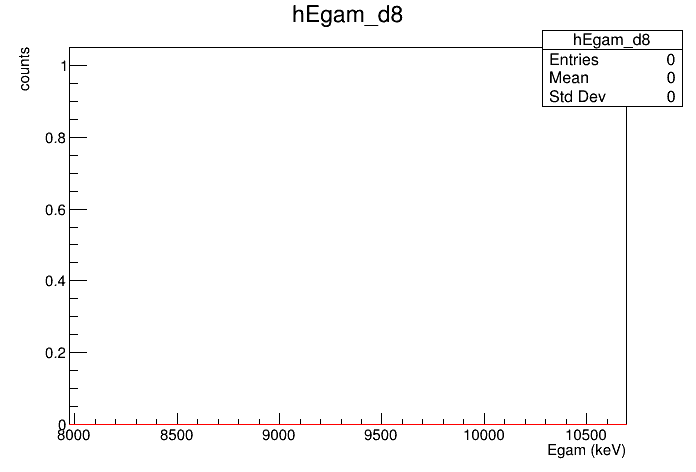

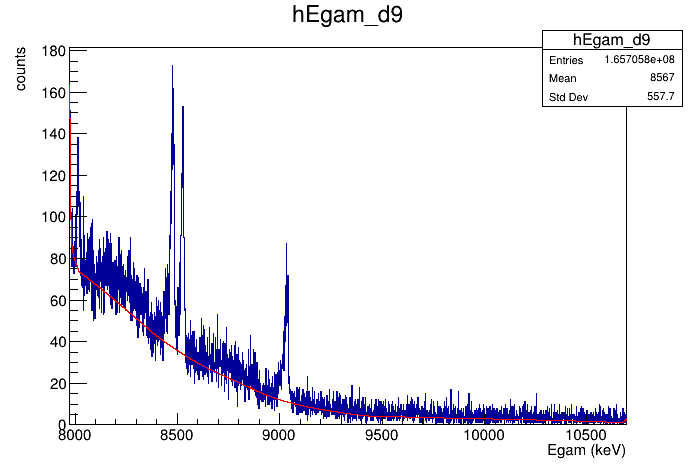

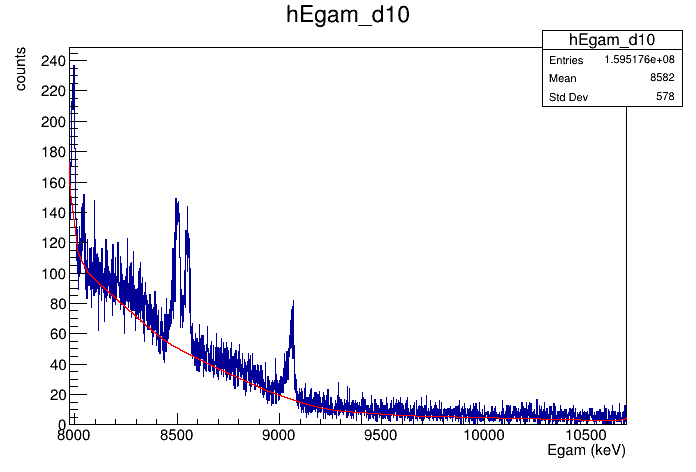

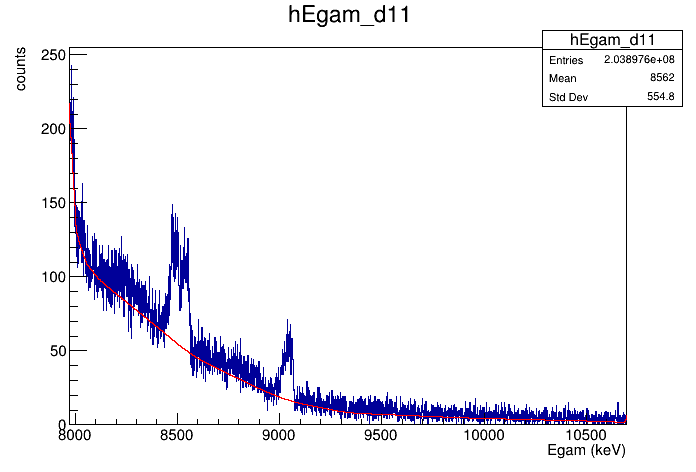

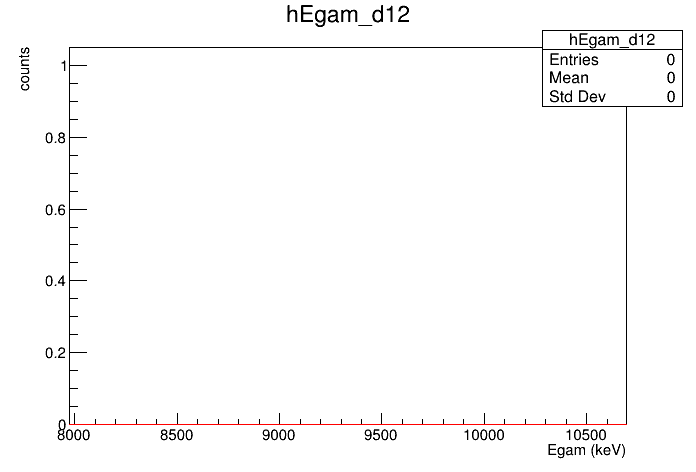

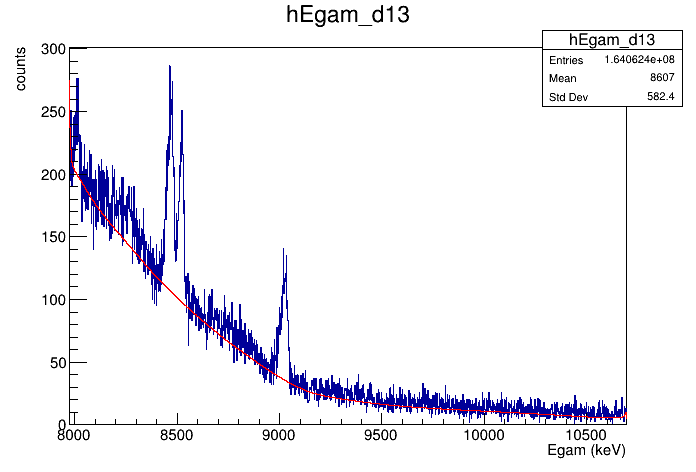

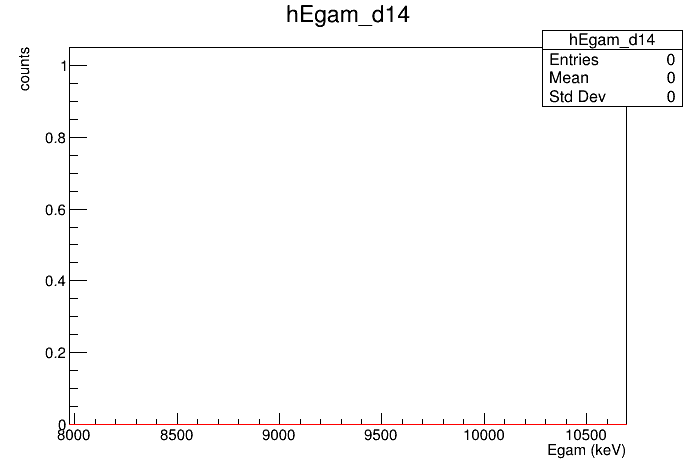

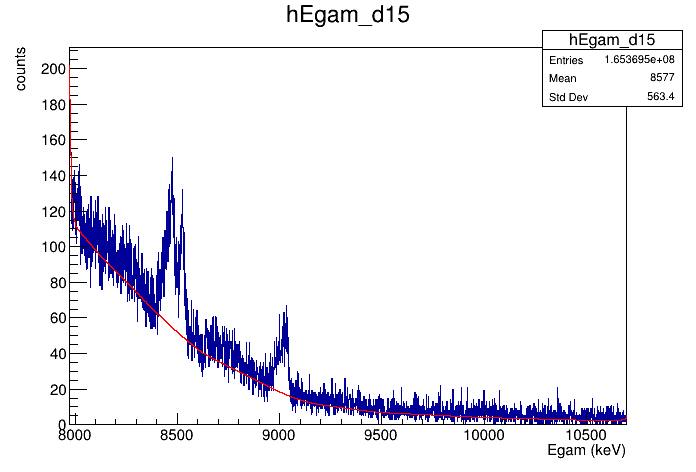

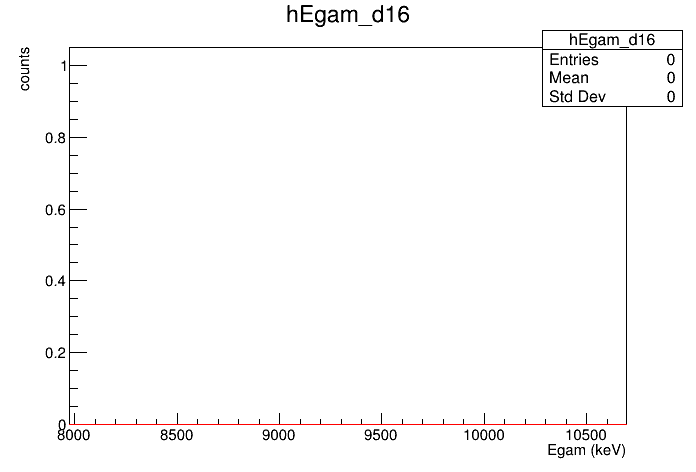

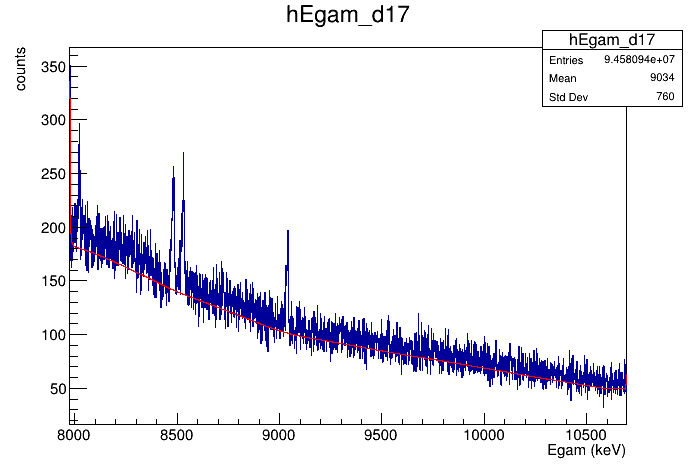

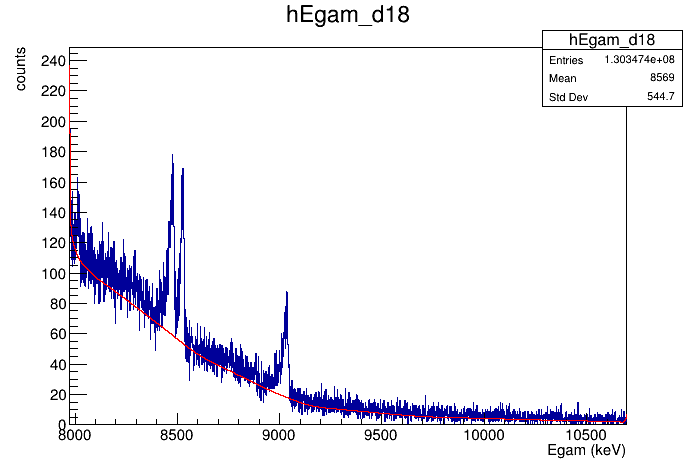

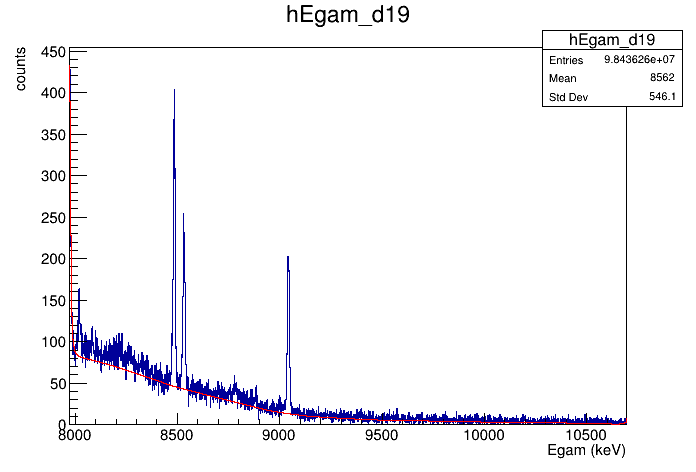

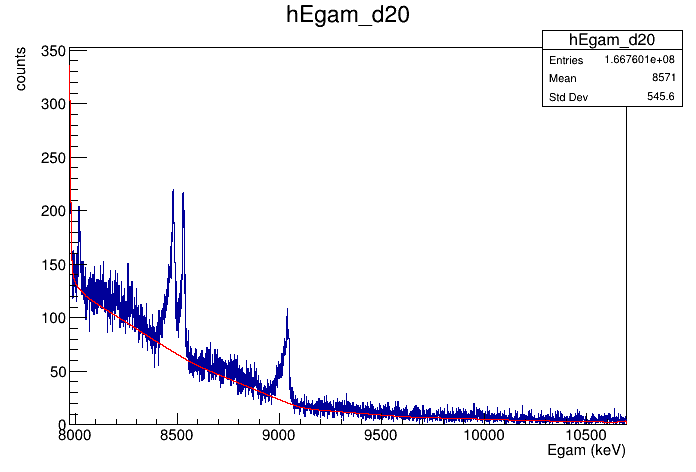

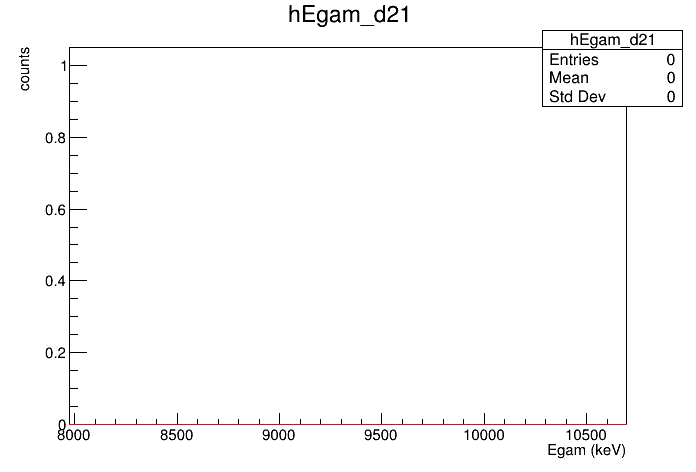

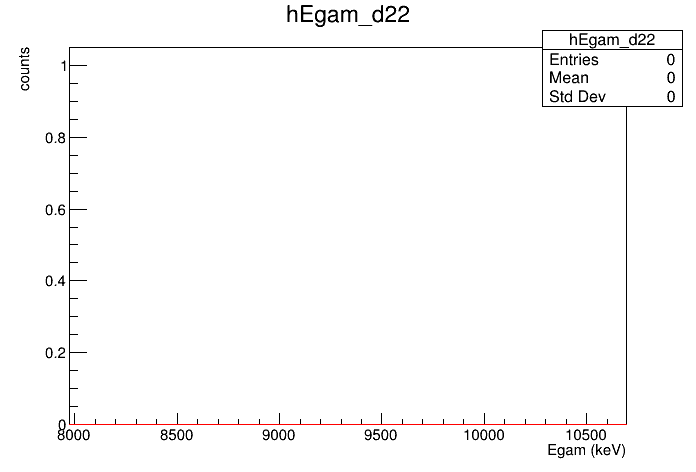

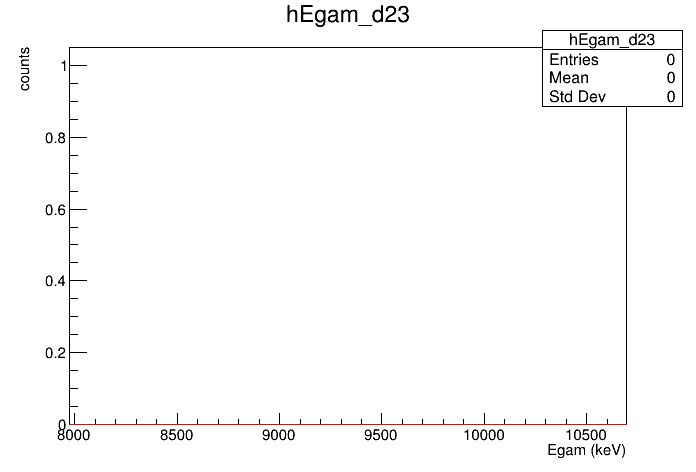

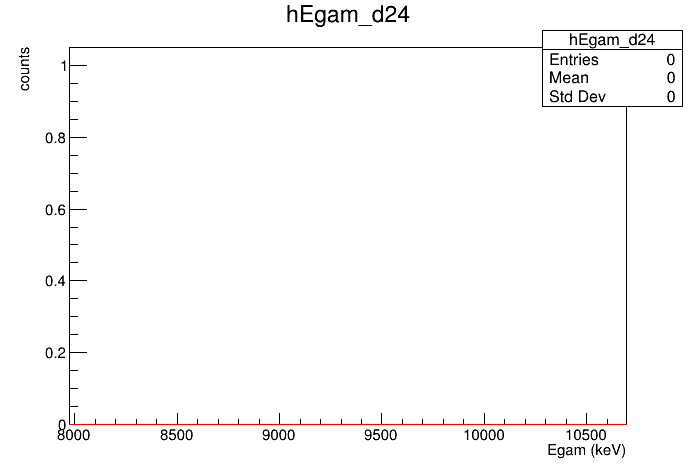

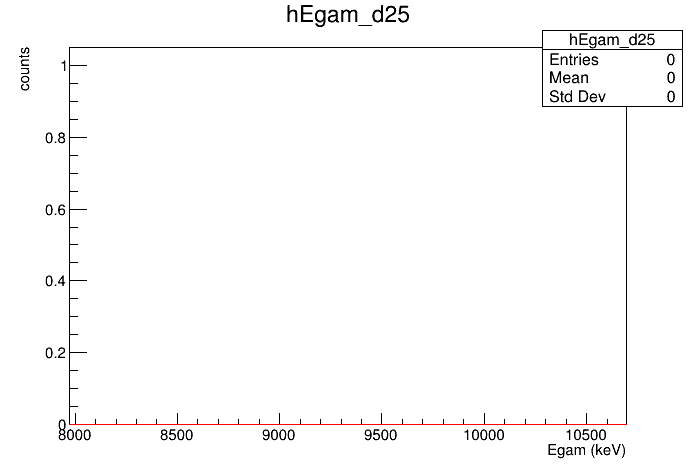

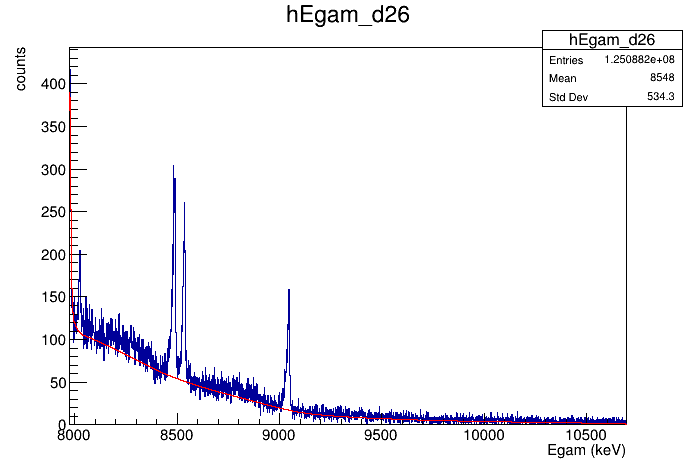

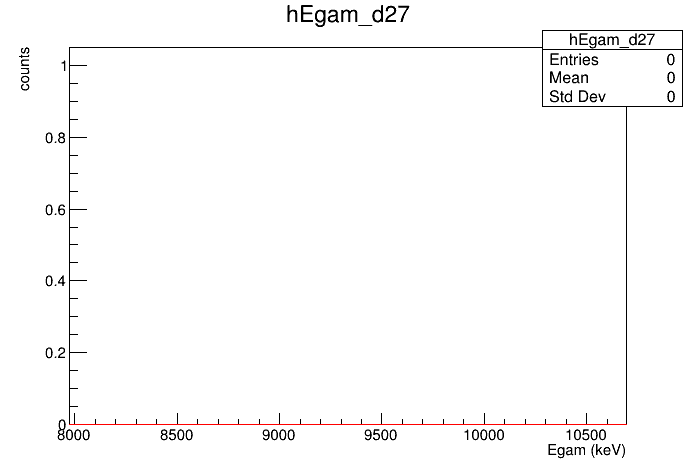

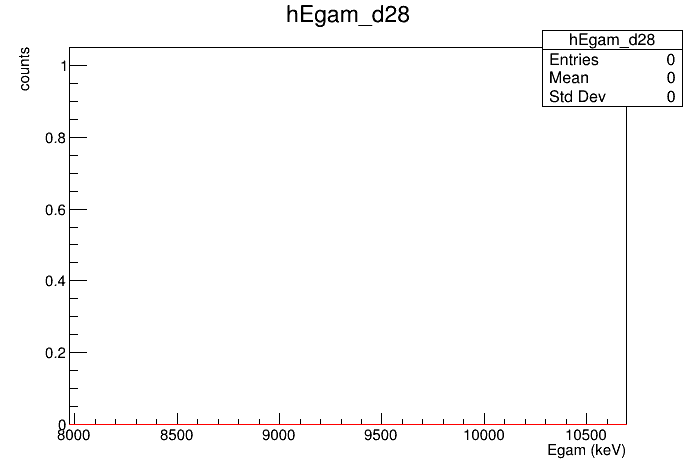

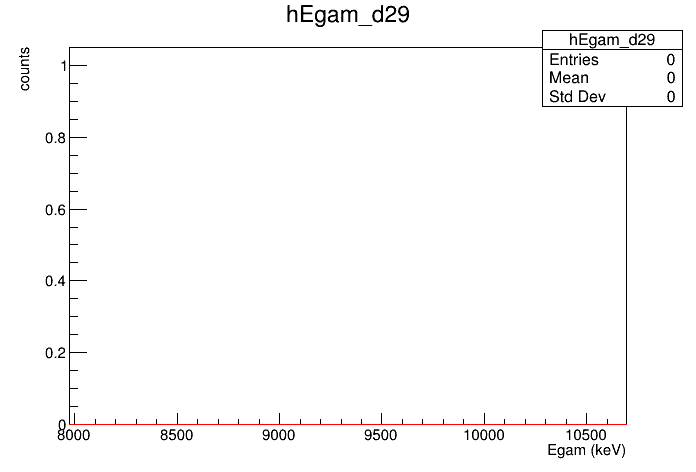

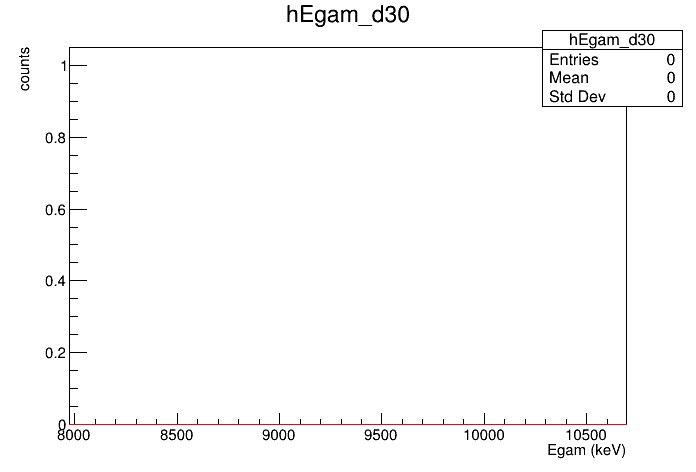

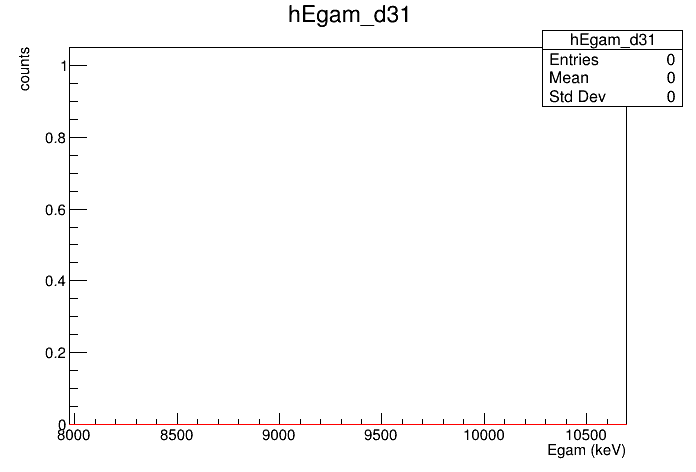

In [6]:
%jsroot off

gate = [9316,9408]
gate_bkg = [9474,9694]

gate_SE = [8860,8892]
gate_bkg_SE = [8908,8968]

canvas_list = []
scale_list = []
scale_list_SE = []



for key, hEgam in hEgam_dict.items():
    
            
    c = ROOT.TCanvas()
    
    hEgam.GetXaxis().SetRangeUser(gate_bkg[0]-1500,gate_bkg[1]+1000)
    hEgam.Draw()
    hEgam_bkg = hEgam.ShowBackground(80)
    
    try:     
        num = hEgam_bkg.Integral(hEgam_bkg.GetXaxis().FindBin(gate[0]),hEgam_bkg.GetXaxis().FindBin(gate[1]))
        dem = hEgam_bkg.Integral(hEgam_bkg.GetXaxis().FindBin(gate_bkg[0]),hEgam_bkg.GetXaxis().FindBin(gate_bkg[1]))
        scale = num/dem
    except ZeroDivisionError:
        scale = 0
        
    try:     
        num_SE = hEgam_bkg.Integral(hEgam_bkg.GetXaxis().FindBin(gate_SE[0]),hEgam_bkg.GetXaxis().FindBin(gate_SE[1]))
        dem_SE = hEgam_bkg.Integral(hEgam_bkg.GetXaxis().FindBin(gate_bkg_SE[0]),hEgam_bkg.GetXaxis().FindBin(gate_bkg_SE[1]))
        scale_SE = num_SE/dem_SE
    except ZeroDivisionError:
        scale_SE = 0
        
    
    canvas_list.append(c)
    scale_list.append(scale)
    scale_list_SE.append(scale_SE)
    
                
            
print(scale_list)
print(scale_list_SE)
ROOT.gROOT.GetListOfCanvases().Draw()        

In [7]:
hEn_gatebkg_dict = hists.get("hEn_gate9394bkg")
hEn_gatebkgSE_dict = hists.get("hEn_gate9394SEbkg")

scaled_dict = {}
scaled_dict["hEn_gate9394bkg_scaled"] = {}
scaled_dict["hEn_gate9394SEbkg_scaled"] = {}



i = 0
for key, hist in hEn_gatebkg_dict.items():
    key_scaled = utils.rename_string(key,'scaled')
    
    hist_scaled = hist.Clone()
    hist_scaled.SetTitle(key_scaled)
    hist_scaled.SetName(key_scaled)
    hist_scaled.Scale(scale_list[i])
    
    scaled_dict["hEn_gate9394bkg_scaled"][key_scaled] = hist_scaled
    
    i+=1
    
i = 0
for key, hist in hEn_gatebkgSE_dict.items():
    key_scaled = utils.rename_string(key,'scaled')
    
    hist_scaled = hist.Clone()
    hist_scaled.SetTitle(key_scaled)
    hist_scaled.SetName(key_scaled)
    hist_scaled.Scale(scale_list_SE[i])
    
    scaled_dict["hEn_gate9394SEbkg_scaled"][key_scaled] = hist_scaled
    
    i+=1
    
hists_scaled = hm.HistogramManager(scaled_dict)
hists_scaled.write("../output/2023apr_asym_Cd_bkg_constbin.root")

In [8]:
# %jsroot on

# c = hists.plot_folder("hEn_gate9394bkg",2,30)
# c.Draw()

# c1 = hists_scaled.plot("hEn_gate9394bkg_scaled",2,30)

# for canvas in c1:
#     canvas.Draw()

# ROOT.gROOT.GetListOfCanvases().Draw()  
    
    